# Pedestrian_Tracking Main

created by wendycao 01/2025

#### When running in google colab:

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%cd /content/
!git clone  "https://github.com/wendycao411/Pedestrian_Tracking.git"

/content
Cloning into 'Pedestrian_Tracking'...
remote: Enumerating objects: 324, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 324 (delta 23), reused 23 (delta 10), pack-reused 277 (from 1)
Receiving objects: 100% (324/324), 97.19 MiB | 12.02 MiB/s, done.
Resolving deltas: 100% (121/121), done.


#### Install all dependencies

In [46]:
%cd /content/Pedestrian_Tracking

/content/Pedestrian_Tracking


In [ ]:
%pip install -e ".[dev]"

Ensure that numpy is the correct version (float is deprecated or smth so we need to use a less recent version)

In [ ]:
%pip show numpy
%pip uninstall numpy -y
%pip install "numpy<1.24"

In [1]:
%pip install os-sys
%pip install roboflow
%pip install inference_sdk
%pip install easydict

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of os-sys to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of os-sys to determine which version is compatible with other requirements. This could take a while.
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

#### Download videos from Google Drive (requires the download link)

*How to generate the download link:*


1.   Get the "Share Link" for the video (make sure anyone can view the video!) - e.g. https://drive.google.com/file/d/1CNjE7CWTuyqgm-zTRGk5qIxSDG8A7P7q/view?usp=drive_link
2.   Get the ID for the video, which is in between the /d/ and /view - e.g. 1CNjE7CWTuyqgm-zTRGk5qIxSDG8A7P7q
3.   Paste the ID in this link: https://drive.google.com/uc?id=(ID HERE)&export=download -- e.g. https://drive.google.com/uc?id=1CNjE7CWTuyqgm-zTRGk5qIxSDG8A7P7q&export=download
4.   Done!



In [47]:
%cd /content/Pedestrian_Tracking/raw-data

/content/Pedestrian_Tracking/raw-data


In [48]:
!gdown https://drive.google.com/uc?id=1CNjE7CWTuyqgm-zTRGk5qIxSDG8A7P7q&export=download

Downloading...
From (original): https://drive.google.com/uc?id=1CNjE7CWTuyqgm-zTRGk5qIxSDG8A7P7q
From (redirected): https://drive.google.com/uc?id=1CNjE7CWTuyqgm-zTRGk5qIxSDG8A7P7q&confirm=t&uuid=48a79d3b-f68e-4b8e-9242-1e28b894ed63
To: /content/Pedestrian_Tracking/raw-data/2023-06-26 truncated 5fps.mp4
100% 330M/330M [00:06<00:00, 55.1MB/s]


#### Preprocessing (make time lapse, skip frames, etc.)

In [20]:
import os
import cv2

video_path = "/content/Pedestrian_Tracking/ultralytics/yolo/data/Kabukicho_240825.mov"
file_name = os.path.splitext(os.path.basename(video_path))[0]

print(file_name)

Kabukicho_240825


In [24]:
# video preprocessing

# option 1 Adjust the frame rate to 5 FPS, and the total duration remains unchanged
!ffmpeg -i "/content/Pedestrian_Tracking/ultralytics/yolo/data/Kabukicho_240825.mov" -r 5 "/content/Pedestrian_Tracking/5fps/Kabukicho_240825_5fps.mp4"


# NOT WORKING YET!!
# # option 2 function: subsample/time lapse video
# def subsample_video(input_path, output_path, time_lapse_interval):
#     cap = cv2.VideoCapture(input_path)
#     if not cap.isOpened():
#         print("Error: Couldn't open video file.")
#         return

#     frame_count = 0
#     fps = cap.get(cv2.CAP_PROP_FPS)
#     width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     codec = cv2.VideoWriter_fourcc(*'XVID')
#     out = cv2.VideoWriter(output_path, codec, fps, (width, height))

#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         # Collect one frame out of every xx frames
#         if frame_count % time_lapse_interval == 0:
#             out.write(frame)

#         frame_count += 1

#     cap.release()
#     out.release()
#     #cv2.destroyAllWindows()

# if __name__ == "__main__":
#     time_lapse_interval = 5 # change here
#     input_file = video_path
#     output_file = f"/content/Pedestrian_Tracking/timelapsed/{file_name}_timelapsed{time_lapse_interval}.mp4"  # Replace with desired output video file path
#     subsample_video(input_file, output_file, time_lapse_interval)
#     print(f"saved to {output_file}")

saved to /content/Pedestrian_Tracking/timelapsed/Kabukicho_240825_timelapsed5.mp4


In [49]:
video_path = "/content/Pedestrian_Tracking/raw-data/2023-06-26 truncated 5fps.mp4"
file_name = os.path.splitext(os.path.basename(video_path))[0]

print(video_path)
print(file_name)

/content/Pedestrian_Tracking/raw-data/2023-06-26 truncated 5fps.mp4
2023-06-26 truncated 5fps


In [50]:
# number of frames in the video
cap = cv2.VideoCapture(video_path)

# Get the file name
file_name = os.path.splitext(os.path.basename(video_path))[0]

# Get the total number of frames of the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
original_fps = cap.get(cv2.CAP_PROP_FPS)

print(f"The total number of frames in the video：{total_frames}\nVideo frame rate：{original_fps}")
cap.release()

The total number of frames in the video：9017
Video frame rate：30.0


#### Moving to the Required Directory

In [51]:
%cd /content/Pedestrian_Tracking/ultralytics/yolo/v8/segment

/content/Pedestrian_Tracking/ultralytics/yolo/v8/segment


#### To implement the DeepSORT tracking, downloading the required files (only needs to be done once at the beginnning of running the code)

In [12]:
!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t
To: /content/Pedestrian_Tracking/ultralytics/yolo/v8/segment/deep_sort_pytorch.zip
100% 43.1M/43.1M [00:00<00:00, 62.1MB/s]


In [13]:
!unzip 'deep_sort_pytorch.zip'

Archive:  deep_sort_pytorch.zip
  inflating: deep_sort_pytorch/.gitignore  
   creating: deep_sort_pytorch/configs/
  inflating: deep_sort_pytorch/configs/deep_sort.yaml  
   creating: deep_sort_pytorch/deep_sort/
  inflating: deep_sort_pytorch/deep_sort/__init__.py  
   creating: deep_sort_pytorch/deep_sort/__pycache__/
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-38.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-38.pyc  
   creating: deep_sort_pytorch/deep_sort/deep/
 extracting: deep_sort_pytorch/deep_sort/deep/__init__.py  
   creating: deep_sort_pytorch/deep_sort/deep/__pycache__/
  inflating: deep_sort_pytorch/d

#### Run the Script for Segmentation with DeepSORT Tracking

In [52]:
print(video_path)

/content/Pedestrian_Tracking/raw-data/2023-06-26 truncated 5fps.mp4


In [59]:
!python predict.py model=yolov8x-seg.pt source="/content/Pedestrian_Tracking/raw-data/2023-06-26_truncated_5fps.mp4"

[2025-01-24 17:25:48,128][root.tracker][INFO] - Loading weights from deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!
2025-01-24 17:25:48.420114: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-24 17:25:48.437050: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-24 17:25:48.457721: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-24 17:25:48.464156: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register fact

#### Display the Demo Video (or you can simply download it)

In [36]:
%pwd

'/content/Pedestrian_Tracking/ultralytics/yolo/v8/segment'

In [37]:
!rm "result_compressed.mp4"

rm: cannot remove 'result_compressed.mp4': No such file or directory


In [ ]:
# from IPython.display import HTML
# from base64 import b64encode
# import os

# # Input video path
# save_path = r"C:\Users\jgcao\Desktop\Wendy's Stuff\VS Code\YOLOv8_Segmentation_DeepSORT_Object_Tracking\runs\detect\train6\2024-07-26 truncated timelapse.mp4"

# # Compressed video path
# compressed_path = "result_compressed.mp4"

# os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# # Show video
# mp4 = open(compressed_path,'rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("""
# <video width=400 controls>
#       <source src="%s" type="video/mp4">
# </video>
# """ % data_url)

## (wip) Data Analysis

In [39]:
%pip install pandas
%pip install matplotlib

In [40]:
#data visualization
import pandas as pd
import matplotlib.pyplot as plt

#### Simple Analysis on Number of People in Shadow

the csv file will save in the raw-data folder (or wherever the video to be processed is found) instead of the train folder, I'll probably fix it later since it's not that high priority

      Frame  in_shadow  out_shadow
0         0          0           0
1         1          0           0
2         2          0           0
3         3          2           4
4         4          2           4
...     ...        ...         ...
2731   2731          5           2
2732   2732          5           2
2733   2733          3           5
2734   2734          3           5
2735   2735          3           5

[2736 rows x 3 columns]


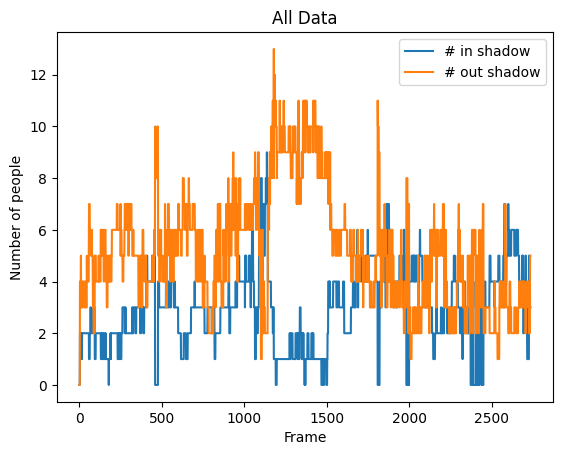

In [60]:
csv_file = "/content/Pedestrian_Tracking/raw-data/2023-06-26_truncated_5fps_output_tracking_data.csv"
data = pd.read_csv(csv_file)
num_in_shadow = {}
num_out_shadow = {}

for i in range(data['frame'].nunique()):
  count = len(data[(data['in_shadow'] == True) & (data['frame'] == i)])
  num_in_shadow[i] = count
  count = len(data[(data['in_shadow'] == False) & (data['frame'] == i)])
  num_out_shadow[i] = count

df = pd.DataFrame([num_in_shadow, num_out_shadow]).T
df.columns = ['in_shadow', 'out_shadow']
df.reset_index(inplace=True)

# Optional: Rename the index column
df.rename(columns={'index': 'Frame'}, inplace=True)

print(df)

fig, ax = plt.subplots()
ax.plot(df['Frame'], df['in_shadow'], label='# in shadow')
ax.plot(df['Frame'], df['out_shadow'], label='# out shadow')
ax.legend()

ax.set_xlabel('Frame')
ax.set_ylabel('Number of people')
plt.title("All Data")

plt.show()

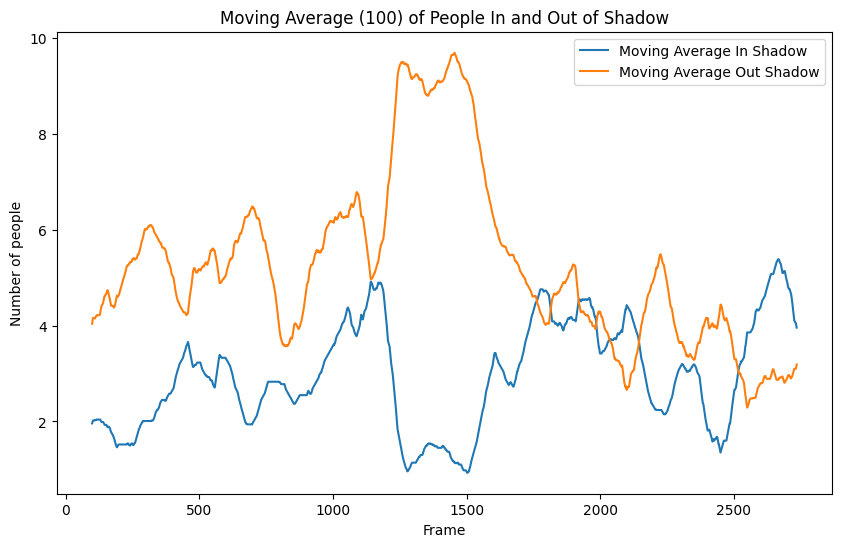

In [64]:
# Calculate the moving average for 'out_shadow'
#edit window
df['ma_out_shadow'] = df['out_shadow'].rolling(window=100).mean()

df['ma_in_shadow'] = df['in_shadow'].rolling(window=100).mean()

# Plot the moving averages
plt.figure(figsize=(10, 6))
plt.plot(df['Frame'], df['ma_in_shadow'], label='Moving Average In Shadow')
plt.plot(df['Frame'], df['ma_out_shadow'], label='Moving Average Out Shadow')
plt.legend()
plt.xlabel('Frame')
plt.ylabel('Number of people')
plt.title('Moving Average (100) of People In and Out of Shadow')
plt.show()